<a href="https://colab.research.google.com/github/matteoalberti/Lectures_introUML_Experis2020/blob/main/Day1_UML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome Again!**

#### Introduction to Unsupervised Machine Learning Pt.1 : CUSTERING!



#### **Lecturer :** Matteo Alberti

*Contacts :* https://www.linkedin.com/in/matteo-alberti-170493/


## Introduction to Supervised and Unsupervised Machine Learning

![](https://www.diegocalvo.es/wp-content/uploads/2018/09/machine-learning-classification.png)




# Clustering

Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).

![](https://matteucci.faculty.polimi.it/Clustering/tutorial_html/images/clustering.gif)

In this case we easily identify the 4 clusters into which the data can be divided; the similarity criterion is **distance**: two or more objects belong to the same cluster if they are “close” according to a given distance (in this case geometrical distance). This is called **distance-based clustering**.



## Clustering vs Classification
Before starting our discussion on k-means clustering, I would like point out the difference between clustering and classification.

- Samples in a classification task have labels. Each data point is classified according to some measurements. Classification algorithms try to model the relationship between measurements (features) on samples and their assigned class. Then the model predicts the class of new samples.

- Samples in clustering do not have labels. We expect the model to find structures in the data set so that similar samples can be grouped into clusters. We basically ask the model to label samples.


## Measure the Quality of Clustering

A good clustering method will produce high quality
clusters with
- high intra-class similarity (**homogeneity**)
- low inter-class similarity (**heterogeneity**)


**How?**

- Dissimilarity/Similarity metric: Similarity is expressed in terms of a
distance function, which is typically metric: d(i, j) 
- many many others . . .

#### Load Packages

In [3]:
#base
import pandas as pd
import numpy as np 
import itertools
from scipy import linalg

#preprocessing and metrics
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.datasets import make_blobs

#plot
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

#models
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import mixture

# DISTANCE BASED CLUSTERING : KMeans

K-means clustering aims to partition data into k clusters in a way that data points in the same cluster are **similar** (*determined by distance*) and data points in the different clusters are farther apart.

- There are many methods to measure the distance. 


Euclidean distance for example comes from **minkowski distance**

![](https://rittikghosh.com/images/min.png)


![](https://www.deeplearningitalia.com/wp-content/uploads/2018/12/ecuation-26.png)





### Let's try with syntetic data


*K-means clustering tries to minimize distances within a cluster and maximize the distance between different clusters.*

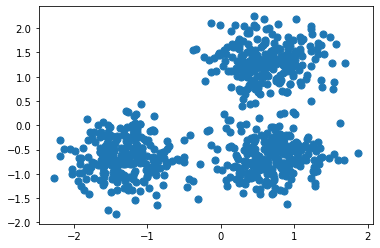

In [10]:
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()




***Introduction to Pseudocode : Kmeans***

![](https://www.cms.waikato.ac.nz/~abifet/book/images/Fig9-1.png)



**Summarize**

After number of clusters are determined, it works by executing the following steps:






Randomly select centroids (center of cluster) for each cluster.

![](https://healthcare.ai/wp-content/uploads/2017/07/Picture2.png)

Calculate the distance of all data points to the centroids.

![](https://healthcare.ai/wp-content/uploads/2017/07/Picture3-300x210.png)

Assign data points to the closest cluster.

![](https://healthcare.ai/wp-content/uploads/2017/07/Picture4-300x201.png)

Find the new centroids of each cluster by taking the mean of all data points in the cluster.

![](https://healthcare.ai/wp-content/uploads/2017/07/Picture5-300x187.png)

Repeat steps 2,3 and 4 until all points converge and cluster centers stop moving.


![](https://miro.medium.com/max/480/1*KrcZK0xYgTa4qFrVr0fO2w.gif)

In [ ]:
# define + fit

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
y_pred = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c = y_pred, s=50)
plt.show()

not so trivial question . . .

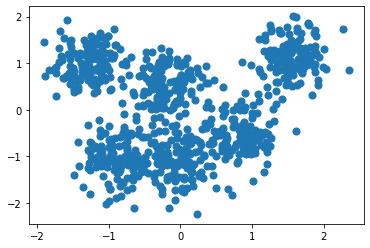

In [14]:
# Generate sample data

X, labels_true = make_blobs(n_samples=750,n_features=10,centers=6, cluster_std=1.3,
                            random_state=0)

X = StandardScaler().fit_transform(X)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()

In [ ]:
for cl in range(1,8):
  kmeans = KMeans(n_clusters = cl)
  kmeans.fit(X)
  y_pred = kmeans.predict(X)
  plt.title('N cluster : {}'.format(cl))
  plt.scatter(X[:, 0], X[:, 1], c = y_pred, s=50)
  plt.show() 

## Question 1) : How can I choose the right number of clusters?

*Remember we are not working with 2 variables (2d plots)*

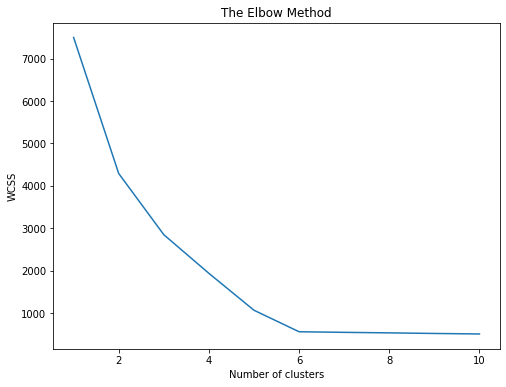

In [ ]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=12, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# What can I say about this plot?

good or a bad cluster segmentation?

Why?

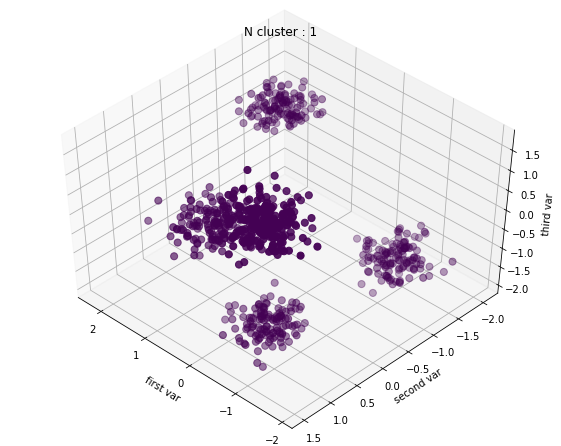

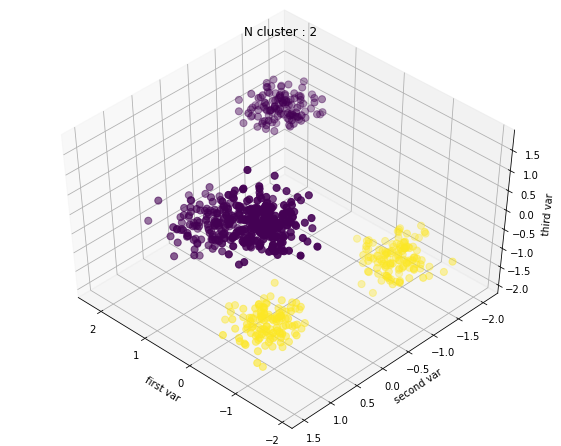

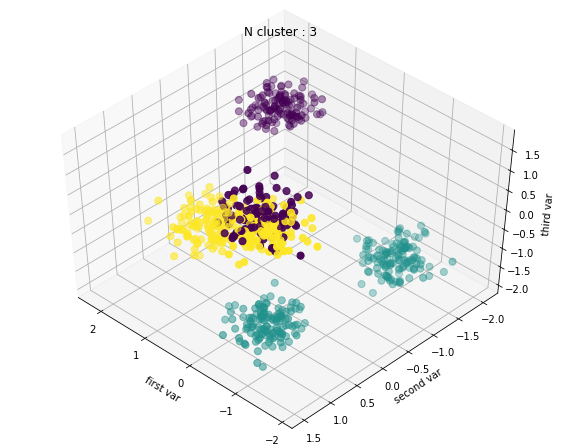

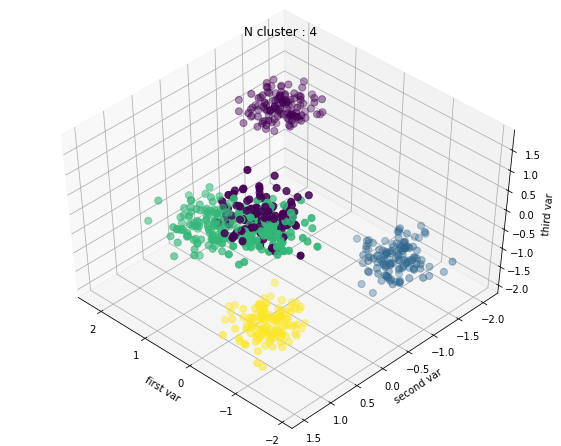

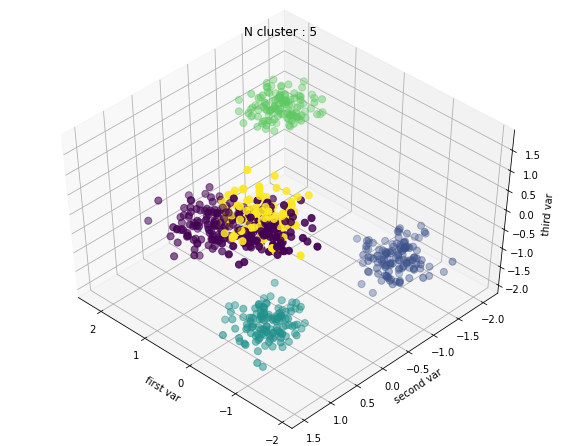

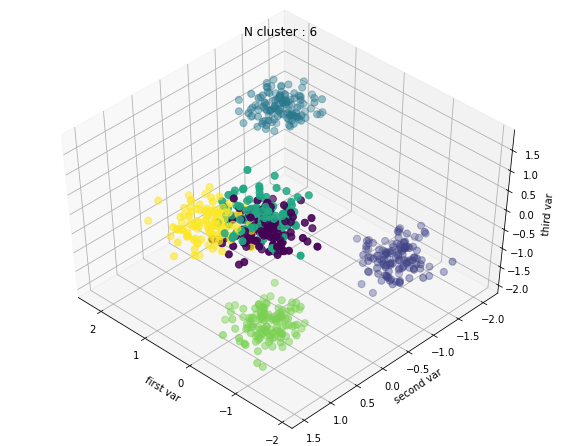

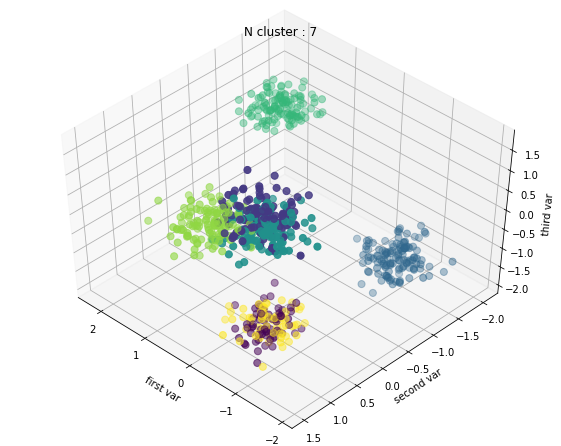

In [ ]:
for cl in range(1,8):
  kmeans = KMeans(n_clusters = cl)
  kmeans.fit(X)
  f4 = plt.figure(1, figsize=(8, 6))
  plt.clf()
  ax = Axes3D(f4, rect=[0, 0, .95, 1], elev=48, azim=134)
  y_pred = kmeans.predict(X)
  plt.cla()
  ax.set_xlabel('first var')
  ax.set_ylabel('second var')
  ax.set_zlabel('third var')
  ax.title('N cluster : {}'.format(cl))
  ax.scatter(X[:, 9], X[:, 5], X[:, 7], c = y_pred, s=50)
  plt.show() 

## Disadvantages of k-means clustering


- **Choosing k manually**. This is the greatest factor in the convergence of the algorithm and can provide widely different results for different values of k.
- Clustering data of varying sizes and density. K-means doesn’t perform well with **clusters of different sizes, shapes, and density**. To cluster such data, you need to generalize k-means.
- Clustering **outliers**. Outliers must be removed before clustering, or they may affect the position of the centroid or make a new cluster of their own.
Being dependent on initial values. As the value of k increases, other algorithms(i.e. k-means seeding) need to be applied to give better values for the initial centroids.
- **Scaling**. As the number of dimensions increases, the difficulty in getting the algorithm to converge increases due to the curse of dimensionality, discussed above.
- **Overlapping** between clusters, k-means doesn’t have an intrinsic measure for uncertainty; thus it’s difficult to identify which points in the overlapping region should be assigned to which class.

**Exercise :**

    Based on this PRO / CONS make your considerations on wine datasets (pre-processing)

## DENSITY BASED CLUSTERING : DBSCAN

*Density-Based Spatial Clustering of Applications with Noise*

**Pseudocode**


<img src=https://miro.medium.com/max/2144/1*_Wk6mbhHGv8nznWrv0WnDQ.png width="600"/>



**Summarize**

- DBSCAN begins with an arbitrary starting data point that has not been visited. The neighborhood of this point is extracted using a **distance epsilon ε**

- If there are a sufficient number of points (according to **minPoints**) within this neighborhood then the clustering process starts and the current data point becomes the first point in the new cluster. Otherwise, the point will be labeled as **noise**

- For this first point in the new cluster, the points within its ε distance neighborhood also become part of the same cluster. This procedure of making all points in the ε neighborhood belong to the same cluster is then repeated for all of the new points that have been just added to the cluster group.

- This process of steps 2 and 3 is repeated until all points in the cluster are determined i.e all points within the ε neighborhood of the cluster have been visited and labeled.

![](https://dashee87.github.io/images/DBSCAN_tutorial.gif)

**Advantages of DBSCAN**

- It does not require a pe-set number of clusters at all
- Identifies outliers as noises


**Disvantages of DBSCAN**

- It doesn’t perform as well as others when the clusters are of varying density
- This drawback also occurs with very high-dimensional (threshold ε)

In [ ]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


**Homogeneity** : 

- A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.

**completeness** :
- A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.

**V-measure**

The V-measure is the harmonic mean between homogeneity and completeness:

$$ v = \frac{(1 + beta) * homogeneity * completeness}{
      (beta * homogeneity + completeness)}$$


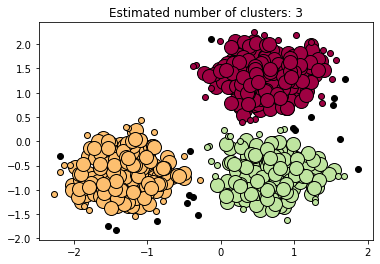

In [ ]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## Expectation–Maximization (EM) Clustering using Gaussian Mixture Models (GMM)


The EM algorithm is an iterative approach that cycles between two modes. The first mode attempts to estimate the missing or latent variables, called the estimation-step or E-step. The second mode attempts to optimize the parameters of the model to best explain the data, called the maximization-step or M-step.

- *E-Step*. Estimate the missing variables in the dataset.
- *M-Step*. Maximize the parameters of the model in the presence of the data.

![](https://dashee87.github.io/images/em_only.gif)

*EM is one of the most important statistical papers of the late 20th century, be gentle*

*Idea :* Rather than simply fitting a distributional model to data (*do you remember binomial example?*), the goal of EM is to fit a model to **high-level / latent** representations of the data.




*What is a Gaussian Distribution??* : **Normal Distribution!!!**






![](https://www.gstatic.com/education/formulas/images_long_sheet/en/normal_distribution.svg)


<img src=https://i0.wp.com/statisticsbyjim.com/wp-content/uploads/2018/04/probability_distribution_heights.png width="400">

<img src=https://i0.wp.com/statisticsbyjim.com/wp-content/uploads/2018/04/normal_distribution_means_different.png width="400">

<img src=https://www.researchgate.net/profile/Jan_Bender/publication/334535945/figure/fig1/AS:781913300144134@1563434066572/Gaussian-bell-function-normal-distribution-N-0-s-2-with-varying-variance-s-2-For.png width="400">

**GMM** is a *mixture model* that uses a combination of Gaussian (Normal) probability distributions and requires the *estimation of the mean and standard deviation parameters* for each.

*Those parameters are estimated with **maximum likelihood** .*

*Let me show with an example :*



We would like to modelize the following distribution of data

<img src=https://miro.medium.com/max/700/1*Z3JJGvEtOjmpLFvmWiUR3Q.png width="400">

*Which model could generate this "layout" of data?*

<img src=https://miro.medium.com/max/700/1*uLKl0Nz1vFg6bmfiqpCKZQ.png width="400">



*If the number of processes was **not known**, a range of different numbers of components could be tested and the model with the best fit could be chosen*

In [16]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

NameError: ignored

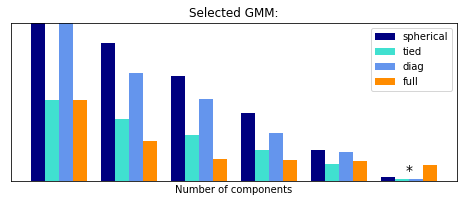

In [9]:
# Number of samples per component
n_samples = 500
C = labels_true
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

plt.xticks(())
plt.yticks(())
plt.title('Selected GMM:')
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_gmm_covariances_001.png)

** Pro / Cons GMM**

- It works with both big and small data
- it thrives when there is **missing information** while other techniques fail (*from image reconstruction to datasets, ect ect ect*)
- no problem with different size of clusters




![](https://miro.medium.com/max/700/0*YFE3gmBUnkIRoykr.png)

## Agglomerative Hierarchical Clustering


Unlike k-means and EM, hierarchical clustering (HC) doesn’t require the user to specify the number of clusters beforehand. Instead it returns an output

If done manually, the user may cut the dendrogram where the merged clusters are too far apart (represented by a long lines in the dendrogram). Alternatively, the user can just return a specific number of clusters (similar to k-means).

![](https://dashee87.github.io/images/hierarch.gif)



Another important concept in HC is the linkage criterion. This defines the distance between clusters as a function of the points in each cluster and determines which clusters are merged/split at each step.


![](https://dashee87.github.io/images/scikit_clustering_13_1.png)


*This is the MAIN problem with UNSUPERVISED LEARNING*

In [ ]:
import scipy.cluster.hierarchy as sch

In [ ]:
Z = sch.linkage(features.iloc[:, -2:], method = 'median')
plt.figure(figsize=(20,7))
den = sch.dendrogram(Z)
plt.title('Dendrogram for the clustering of the dataset wine)')
plt.xlabel('Type')
plt.ylabel('Euclidean distance in the space with other variables')
plt.show()

## Let's compare main clustering algorithms

    Thanks to sklearn for the awesome example

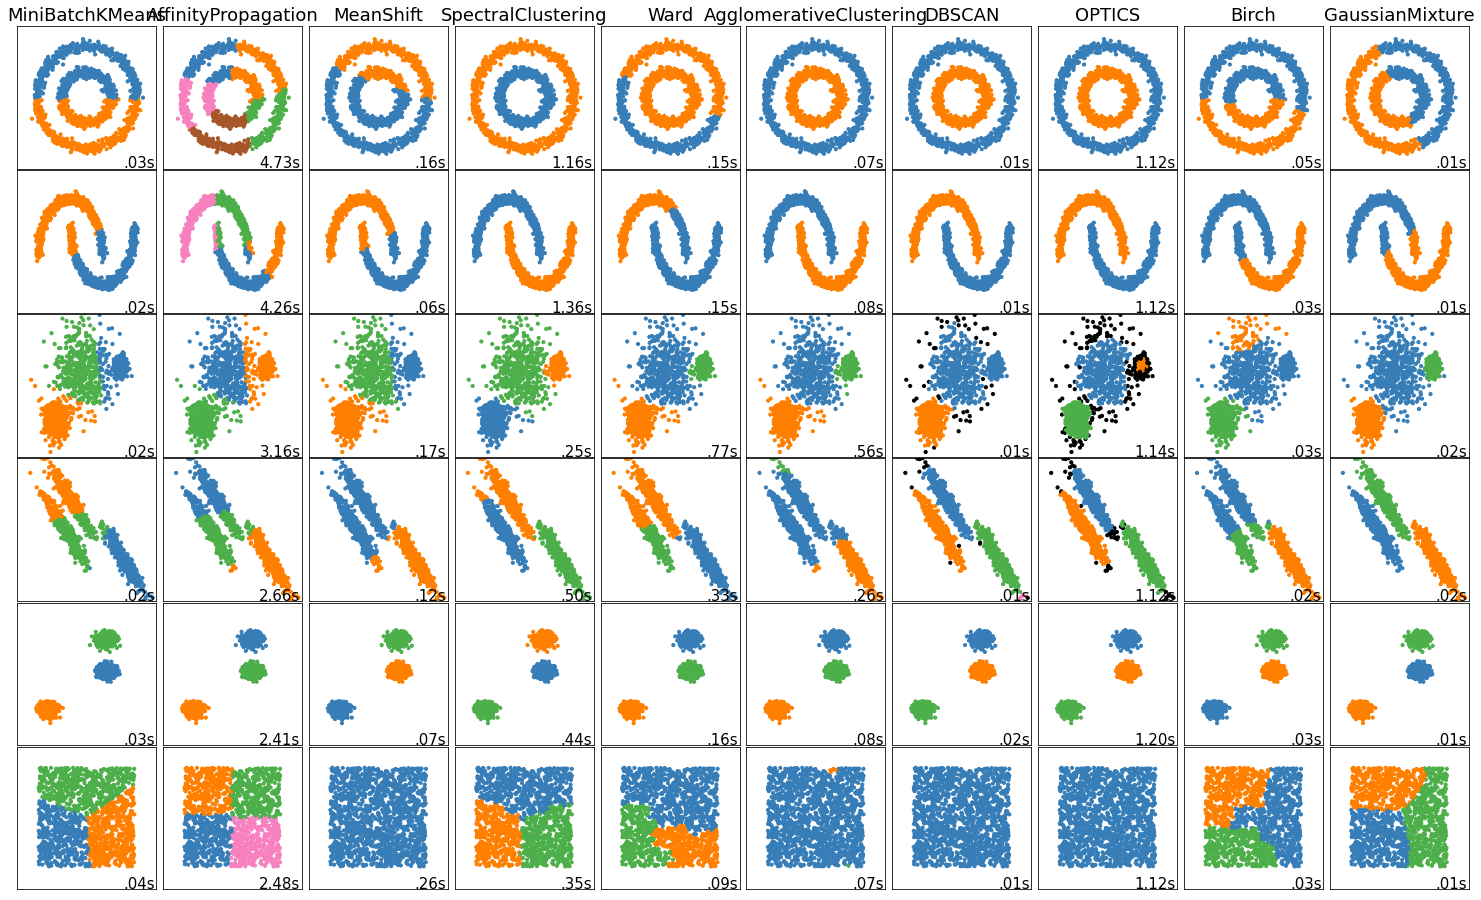

In [21]:
import time
import warnings
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice


# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
    (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    optics = cluster.OPTICS(min_samples=params['min_samples'],
                            xi=params['xi'],
                            min_cluster_size=params['min_cluster_size'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatchKMeans', two_means),
        ('AffinityPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('SpectralClustering', spectral),
        ('Ward', ward),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('OPTICS', optics),
        ('Birch', birch),
        ('GaussianMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

## How can evaluate different Clusering algorithms?

*Use metrics!*


Let me introduce to you **AIC** and **BIC**






# Exercise : Analyze performances with IRIS datasets

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
print (iris.target_names)

['setosa' 'versicolor' 'virginica']


### Load data, if needed, remove target

In [ ]:
features = pd.DataFrame(iris.data, columns=iris.feature_names)
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Preprocessing

In [ ]:
# Normalizing over the standard deviation

X =features.values
Clus_dataset = StandardScaler().fit_transform(X)

### Eploratory Analysis (EDA)

## Start with K-means

    1) can you give me cack the predicted labels?
    2) Can you extract the values of centroids for a given algorithm? (let's say k-means)


In [ ]:
labels_KM = k_means.labels_
print(labels_KM)

### Apply different clustering algoritms and **append as newcolum predicted values of a cluster**

    Tips : 
    
    1) look at documentation and check the optional parameters. Make your experiments and visualize graphically the differences

    2) If I'd like to have some stats? USE groupby mean by each label extracted


    


In [ ]:
# We assign the labels to each row in dataframe.
features['Clus_km'] = labels_KM

In [ ]:
# create 2 dimensional graph
f3, ax = plt.subplots(figsize=(16, 12))
plt.scatter(X[:, 9], X[:, 5], c=labels.astype(np.float), alpha=.5)
plt.xlabel('alcohol', fontsize=18)
plt.ylabel('total sulfur dioxide', fontsize=16)

In [ ]:
features.groupby('Clus_km').mean()

### If performances doen's look as expected... figure out the main reasons and how we could solve that

In [ ]:
# 

### Extra : take a look at your target variable and compare with the resulted value of belonging to the cluster. Any correlation?